In [1]:
!gdown --id 13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu

Permission denied: https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu
Maybe you need to change permission over 'Anyone with the link'?


In [2]:
!mkdir data 
!tar -xf inno_stats.tar.gz -C ./data

mkdir: cannot create directory ‘data’: File exists


In [3]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_groups.csv  10_groups.csv  11_groups.csv  bad_ids.csv  product_groups.csv


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [6]:
# g_10 = pd.read_csv('./data/10_groups.csv')
# g_10.head()

In [7]:
# g_11 = pd.read_csv('./data/11_groups.csv')
# g_11.head()

In [8]:
# p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
# p_g.head()

## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [9]:
bad_ids = pd.read_csv('data/bad_ids.csv')
g_9 = g_9[~g_9['id_card'].isin(set(bad_ids['id_card']))]



order_sum = g_9.groupby('id_doc')['sum'].sum()
order_sum

id_doc
2            396.00
4           1597.00
5            254.00
16           709.06
18           707.00
             ...   
23417859     346.00
23417862     144.00
23417864     324.00
23417867     838.24
23417869      80.00
Name: sum, Length: 6904825, dtype: float64

In [10]:
discount_in_receipt = g_9.groupby('id_doc')['is_green'].sum()
discount_in_receipt

id_doc
2           0
4           0
5           0
16          0
18          0
           ..
23417859    0
23417862    3
23417864    0
23417867    0
23417869    0
Name: is_green, Length: 6904825, dtype: int64

In [11]:
from scipy.stats import pearsonr
sum = list(order_sum)
discounts = list(discount_in_receipt)
print(pearsonr(sum, discounts))

(0.03786160208996919, 0.0)


### Correlation coefficient is close to 0 indicating that there is no correlation between order sum and number of discounts

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [12]:
g_9.index = pd.to_datetime(g_9['date'], format='%Y-%m-%d %H:%M:%S')
purchases_per_day = g_9.groupby(by=g_9.index.day)['id_doc'].count()


In [13]:
print(purchases_per_day)

date
1     1269893
2     1285415
3     1287425
4     1270192
5     1053459
6     1158077
7     1371646
8     1227093
9     1336351
10    1305395
11    1284777
12    1087414
13    1168560
14    1370166
15    1316259
16    1326892
17    1181904
18    1429865
19    1168649
20    1206583
21    1370546
22    1352159
23    1343573
24    1336031
25    1364338
26    1130494
27    1220942
28    1415253
29    1411357
30    1415295
Name: id_doc, dtype: int64


(0.0, 1800000.0)

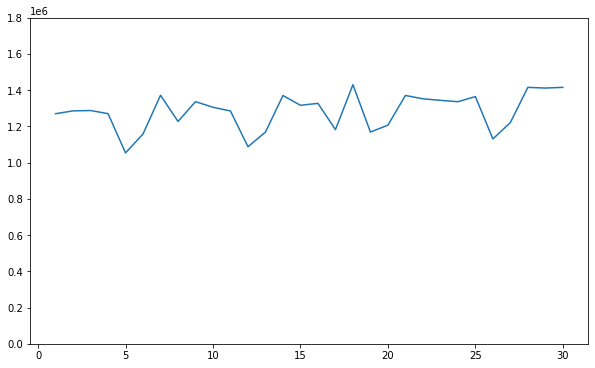

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(purchases_per_day)
plt.ylim(0, 1.8e6)

### There are some peak values in the graph. However values in these days are not that different relatively to values in other days

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount - The customers grouped by the total numer of orders 
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

### Frequent buyers - everyday buyers



In [15]:
g_9['day'] = g_9.index.day
everyday = g_9.groupby('id_card')['day'].nunique().sort_values(ascending=False)
print(everyday[everyday==30])



id_card
1507020    30
6183       30
1572850    30
1790219    30
1334945    30
58154      30
1230989    30
360536     30
184349     30
550152     30
1648549    30
1494193    30
612380     30
1184159    30
1160908    30
57303      30
5096       30
1456677    30
620767     30
503718     30
1032222    30
1322471    30
1430373    30
1583742    30
1521626    30
1308754    30
919837     30
569448     30
1002800    30
537739     30
190267     30
1472222    30
521971     30
904949     30
974512     30
1824958    30
1198040    30
777364     30
439307     30
1109850    30
1126944    30
333896     30
1804583    30
1144271    30
219805     30
121629     30
486190     30
200025     30
Name: day, dtype: int64


### Usual Cart

In [16]:
g_9.groupby('id_group')['id_card'].unique()

id_group
-9999     [1672691, 82434, 954793, 1572538, 1408606, 683...
 10004    [1538855, 267307, 610220, 441497, 389692, 3110...
 10005    [31109, 511852, 1254751, 563773, 736602, 16969...
 10008    [1360897, 954793, 1841743, 626319, 389640, 924...
 10012    [1572538, 297933, 149795, 469039, 1318057, 172...
                                ...                        
 10481    [178771, 245508, 518187, 73808, 175105, 161914...
 10499    [552726, 1220525, 294237, 303445, 742939, 2720...
 10503    [766318, 609754, 1822326, 1448679, 106364, 149...
 10506    [128411, 28540, 232592, 1306012, 499888, 17956...
 52194    [686029, 125830, 227162, 890413, 334262, 81074...
Name: id_card, Length: 164, dtype: object